# **Book** :Moby Dick; or The Whale, by Herman Melville

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk import punkt
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from string import punctuation
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
nltk.download('brown')
import regex as re
import math
from collections import Counter



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [ ]:
file_content = open("/content/moby.txt").read()


In [ ]:
tokens = nltk.word_tokenize(file_content)


# **b**

In [ ]:
text = nltk.Text(tokens)


In [ ]:
punc_8 =['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}',"‘","’", '~',"”","’","’","“","***","****","—","*****","^","...","a","ye","d","the","and",str(range(0,1000))]
remove_and_clean_final = [i for i in text if i not in punc_8]

In [ ]:
first_tokenized_lowered = words = [s.lower() for s in remove_and_clean_final if s]

In [ ]:
fd = nltk.FreqDist(word for word in first_tokenized_lowered)


In [ ]:
most_comm_20= fd.most_common(n=20)
most_comm_20

[('of', 6711),
 ('to', 4660),
 ('in', 4208),
 ('that', 3016),
 ('his', 2515),
 ('it', 2471),
 ('i', 2072),
 ('he', 1867),
 ('s', 1794),
 ('but', 1782),
 ('with', 1766),
 ('is', 1735),
 ('as', 1729),
 ('was', 1636),
 ('for', 1629),
 ('all', 1494),
 ('this', 1406),
 ('at', 1326),
 ('not', 1227),
 ('by', 1215)]

In [ ]:
word_count = Counter(first_tokenized_lowered)
sorted_word_counts = sorted(word_count, key=word_count.get, reverse=True)
the_freq = sorted(word_count.values(),  reverse=True) 
take_the_20_most= the_freq[:20]
top_20_index = list(range(1, len(word_count)+1))  # list (1-number of words)

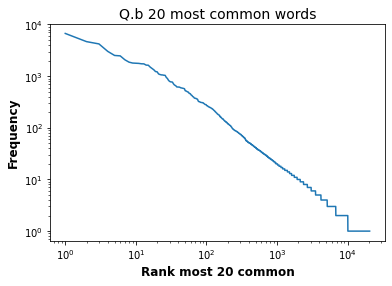

In [ ]:
fig = plt.figure()
plt.title("Q.b 20 most common words", fontsize=14)
plt.xlabel('Rank most 20 common', fontsize=12, fontweight="bold")
plt.ylabel('Frequency', fontsize=12, fontweight="bold")
plt.loglog(top_20_index, the_freq)

#**c**

In [ ]:
stopwords_en = stopwords.words('english')


In [ ]:
stopwords_en = set(stopwords.words('english'))
#try to remove the stopwords from the first article
b = [word for word in first_tokenized_lowered if word not in stopwords_en]

In [ ]:
stopwords_en_pluspunct = stopwords_en.union(set(punctuation))


In [ ]:
# Remove punctuation and numbers from words
removing_punc = [word for word in b if word not in stopwords_en_pluspunct]
removing_punc_2 = [word for word in removing_punc if word.isalpha]


In [ ]:
fd_2 = nltk.FreqDist(word for word in removing_punc_2)


In [ ]:
most_comm_20_2= dict(fd_2.most_common(n=20))
most_comm_20_2.items()

dict_items([('whale', 1075), ('one', 901), ('like', 576), ('upon', 567), ('ahab', 494), ('man', 483), ('ship', 460), ('old', 443), ('would', 429), ('sea', 375), ('though', 364), ('yet', 337), ('time', 322), ('captain', 320), ('long', 312), ('chapter', 308), ('still', 308), ('great', 305), ('said', 298), ('must', 292)])

In [ ]:
most_comm_20_2.keys()

dict_keys(['whale', 'one', 'like', 'upon', 'ahab', 'man', 'ship', 'old', 'would', 'sea', 'though', 'yet', 'time', 'captain', 'long', 'chapter', 'still', 'great', 'said', 'must'])

In [ ]:
word_count_2 = Counter(removing_punc_2)
sorted_word_counts_2 = sorted(word_count_2, key=word_count_2.get, reverse=True)
the_freq_2 = sorted(word_count_2.values(),  reverse=True) 
take_the_20_most_2= the_freq_2[:20]
top_20_index_2 = list(range(1, len(word_count_2)+1))  # list (1-number of words)

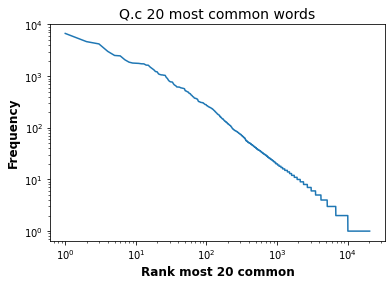

In [ ]:
fig = plt.figure()
plt.title("Q.c 20 most common words", fontsize=14)
plt.xlabel('Rank most 20 common', fontsize=12, fontweight="bold")
plt.ylabel('Frequency', fontsize=12, fontweight="bold")
plt.loglog(top_20_index, the_freq)

#**d**


In [ ]:
porter = PorterStemmer()


In [ ]:
after_stemming = [porter.stem(word) for word in removing_punc_2]

In [ ]:
fd_3= nltk.FreqDist(word for word in after_stemming)
fd_3.items()

dict_items([('\ufeff', 1), ('project', 107), ('gutenberg', 31), ('ebook', 17), ('mobi', 84), ('dick', 82), ('whale', 1455), ('herman', 4), ('melvil', 4), ('use', 125), ('anyon', 6), ('anywher', 16), ('cost', 6), ('almost', 196), ('restrict', 6), ('whatsoev', 7), ('may', 251), ('copi', 37), ('give', 132), ('away', 179), ('re-us', 2), ('term', 42), ('licens', 19), ('includ', 35), ('onlin', 4), ('www.gutenberg.org', 3), ('titl', 6), ('author', 27), ('releas', 1), ('date', 4), ('decemb', 5), ('25', 3), ('2008', 1), ('2701', 1), ('last', 278), ('updat', 2), ('3', 10), ('2017', 1), ('languag', 7), ('english', 48), ('charact', 16), ('set', 100), ('encod', 1), ('utf-8', 1), ('start', 76), ('produc', 22), ('daniel', 4), ('lazaru', 7), ('jonesey', 2), ('david', 2), ('widger', 2), ('moby-dick', 2), ('content', 28), ('etymolog', 2), ('extract', 15), ('suppli', 25), ('sub-sub-librarian', 2), ('chapter', 315), ('1', 5), ('loom', 16), ('2', 3), ('carpet-bag', 5), ('spouter-inn', 5), ('4', 5), ('count

In [ ]:
most_comm_20_3= dict(fd_3.most_common(n=20))
most_comm_20_3.items()

dict_items([('whale', 1455), ('one', 920), ('like', 590), ('upon', 567), ('ship', 553), ('man', 496), ('ahab', 495), ('sea', 461), ('seem', 460), ('old', 443), ('time', 434), ('would', 429), ('boat', 424), ('though', 364), ('captain', 342), ('hand', 338), ('yet', 337), ('head', 331), ('look', 322), ('long', 317)])

In [ ]:
most_comm_20_3.keys()

dict_keys(['whale', 'one', 'like', 'upon', 'ship', 'man', 'ahab', 'sea', 'seem', 'old', 'time', 'would', 'boat', 'though', 'captain', 'hand', 'yet', 'head', 'look', 'long'])

In [ ]:
word_count_3 = Counter(after_stemming)
sorted_word_counts_3 = sorted(word_count_3, key=word_count_3.get, reverse=True)
the_freq_3 = sorted(word_count_3.values(),  reverse=True) 
take_the_20_most_3= the_freq_3[:20]
top_20_index_3 = list(range(1, len(word_count_3)+1))  # list (1-number of words)
most_comm_20_3.keys()

dict_keys(['whale', 'one', 'like', 'upon', 'ship', 'man', 'ahab', 'sea', 'seem', 'old', 'time', 'would', 'boat', 'though', 'captain', 'hand', 'yet', 'head', 'look', 'long'])

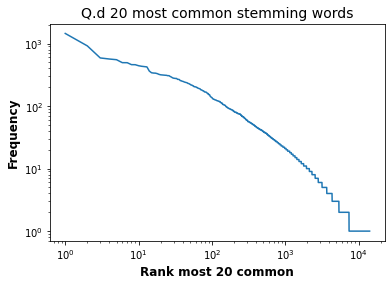

In [ ]:
fig = plt.figure()
plt.title("Q.d 20 most common stemming words", fontsize=14)
plt.xlabel('Rank most 20 common', fontsize=12, fontweight="bold")
plt.ylabel('Frequency', fontsize=12, fontweight="bold")
plt.loglog(top_20_index_3, the_freq_3)

#**e**


In [ ]:
#try anthoer approch of textblob
blob = TextBlob(file_content)


In [ ]:
document_sentence = blob.sentences


In [ ]:
document_nouns_pharse = blob.noun_phrases


In [ ]:
lowerd =[s.lower() for s in document_nouns_pharse if s]


In [ ]:
punc_1 =['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}',"‘","’", '~',"”","’","’","“","***","****","—","*****","^","...","a","ye","d","the","and",str(range(0,1000))]
remove_1 = [i for i in lowerd if i not in punc_1]


In [ ]:
check =[i for i in remove_1 if len(i.split())>1]

In [ ]:
check_adj_noun = [nltk.pos_tag(i.split()) for i in check  ]


In [ ]:
check_adj_noun_remove = [i for i in check_adj_noun if i[0][1].startswith("JJ") ]

In [ ]:
#how to put at their order into a list
clean_remove = [i for j in check_adj_noun_remove for (i,pos) in j]


In [ ]:
cosmetics=[item.replace("—", "") for item in clean_remove]
cosmetics_2=[item.replace("_", "") for item in cosmetics]
cosmetics_3=[item.replace("/", "") for item in cosmetics_2]
cosmetics_4=[item.replace("—_", "") for item in cosmetics_3]
cosmetics_5=[item.replace(".", "") for item in cosmetics_4]
removes = [i for i in cosmetics_5 if i not in punc_1]


In [ ]:
try_npun_pharse = " ".join(removes)
nounadj_agter_clean = TextBlob(try_npun_pharse).noun_phrases
nounadj_agter_clean

WordList(['english character david widger moby-dick s story', 'monstrous pictures', 'true pictures s story', 'whale whale', 's archives', 'public domain', 'hard copy version', 'old lexicons', 'old grammars', 'poor devil higgledy-piggledy whale statements', 'veritable gospel cetology', 'poor devil sallow tribe', 'full eyes empty glasses', 'unpleasant sadnessgive', 'unsplinterable glasses', 'great whales genesis', 'great fish', 'strong sword', 'great swallow indian sea breedeth', 'monstrous size', 'true history', 'great value', 'own country s verbal narrative', 'dreadful gulf whale s', 'great security', 'noble prophet whale s liver', 'monstrous bulk', 'incredible quantity history sovereignest thing returne againe s worker', 'vast bodies nescio quid', 'sir sperma ceti whale', 'modern flail ponderous tail', 'artificial man ocean stream paradise', 'such huge troops', 'eighty feet', 'vast quantity s voice obey n', 'large whales southern seas', 'special note', 'important charge seven-fold fen

In [ ]:
dfsd=nltk.FreqDist(word for word in nounadj_agter_clean)
most_comm_20_noun= dict(dfsd.most_common(n=20))
most_comm_20_noun.items()

dict_items([('old man', 34), ('white whale', 14), ('electronic works', 14), ('electronic work', 11), ('right whale', 8), ('public domain', 6), ('long time', 6), ('old times', 6), ('mortal man', 6), ('white man', 5), ('old age', 5), ('young man', 5), ('upper part', 5), ('white water', 5), ('old man s', 5), ('dead whale', 4), ('small degree', 4), ('proper place', 4), ('spare boats', 4), ('poor devils', 4)])

In [ ]:
most_comm_20_noun.keys()

dict_keys(['old man', 'white whale', 'electronic works', 'electronic work', 'right whale', 'public domain', 'long time', 'old times', 'mortal man', 'white man', 'old age', 'young man', 'upper part', 'white water', 'old man s', 'dead whale', 'small degree', 'proper place', 'spare boats', 'poor devils'])

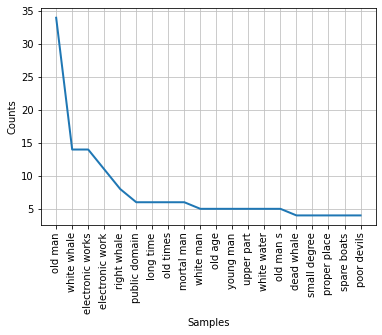

In [ ]:
words_of_nounadj = np.array(most_comm_20_noun.keys())
counters_noun_common = np.array(most_comm_20_noun.values())
dfsd.plot(20)

In [ ]:
word_count_4 = Counter(nounadj_agter_clean)
sorted_word_counts_4 = sorted(word_count_4, key=word_count_4.get, reverse=True)
the_freq_4 = sorted(word_count_4.values(),  reverse=True) 
take_the_20_most_4= the_freq_4[:20]
top_20_index_4 = list(range(1, len(word_count_4)+1))  # list (1-number of words)


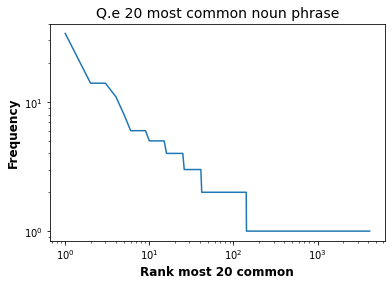

In [ ]:
fig = plt.figure()
plt.title("Q.e 20 most common noun phrase", fontsize=14)
plt.xlabel('Rank most 20 common', fontsize=12, fontweight="bold")
plt.ylabel('Frequency', fontsize=12, fontweight="bold")
plt.loglog(top_20_index_4, the_freq_4)

#**f**

Show one example sentence where POS tagging made a mistake (explain):

"wide field saddest city thou'"

We can see that the sentence is cut off at the worng part because maybe the selection part for sentence was not so good. maybe the when it was pos tagging the the textblop didnt recognize that well the the tagging or some thing like ' is confusing the function. so he ommit the t at the end of the word. and the combinations of the words as noun parhse are terbble but still more acurte than NLTK.

#**g**

In [ ]:
fd_5=nltk.pos_tag(removing_punc_2)


In [ ]:
tag_word = [word for word,pos  in fd_5  if pos.startswith("NNP") or pos.startswith("NNPS")]

len(tag_word)
cosmetic =[item.replace("—", "") for item in tag_word]
cosmetic_2=[item.replace("_", "") for item in cosmetic]
cosmetic_3=[item.replace("/", "") for item in cosmetic_2]
cosmetic_4=[item.replace("—_", "") for item in cosmetic_3]
cosmetic_5=[item.replace(".", "") for item in cosmetic_4]



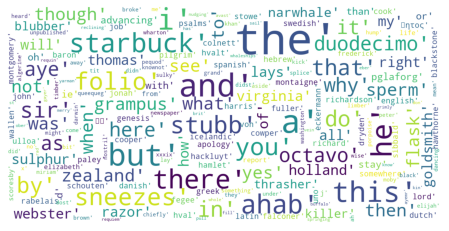

In [ ]:
wordcloud = WordCloud(stopwords=stopwords_en,
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(cosmetic_5))
fig = plt.figure(1, figsize=(8, 4))
plt.axis('off')
plt.imshow(wordcloud)


#**h**

Write a regular expression to find the set of all strings with two consecutive repeated words, with
potential punctuation between them (e.g., “well well”, “so so”, and “no, no”). (Hint: \b is a word
boundary, and \1 references the first captured match). Run on your text and report any found

In [ ]:
re.findall(r'\b(\w+) (\1)\b', str(document_sentence))

[('Ay', 'Ay'),
 ('had', 'had'),
 ('that', 'that'),
 ('had', 'had'),
 ('that', 'that'),
 ('had', 'had'),
 ('that', 'that'),
 ('had', 'had'),
 ('dat', 'dat'),
 ('that', 'that'),
 ('that', 'that'),
 ('that', 'that'),
 ('that', 'that'),
 ('that', 'that'),
 ('had', 'had'),
 ('had', 'had'),
 ('that', 'that')]